<a href="https://colab.research.google.com/github/LawTAGS/Deep-Learning-Classwork/blob/main/DL_01_Multi_Layer_Perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
  return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
  return x * (1 - x)

def mean_squared_error(y_true, y_pred):
  return np.mean((y_true - y_pred) ** 2)

# Define the Multi Layer Perceptron
class MLP:
  np.random.seed(20250303)
  def __init__(self, layer_sizes):
    self.layer_sizes = layer_sizes # Store layer structure
    self.num_layers = len(layer_sizes) # Number of layers

    # Initialize weights and biases for each layer
    self.weights = [np.random.randn(layer_sizes[i-1], layer_sizes[i]) for i in range(1, self.num_layers)]
    self.biases = [np.zeros((1, size)) for size in layer_sizes[1:]]

  def forward(self, X):
    self.layer_outputs = [X] # Store activations of each layer

    # Forward propagation through hidden layers
    for i in range(self.num_layers - 2): # (- 2) for input and output layer
      layer_input = np.dot(self.layer_outputs[-1], self.weights[i]) + self.biases[i]
      layer_output = sigmoid(layer_input)
      self.layer_outputs.append(layer_output)

    # Forward propagation for the output layer
    output_layer_input = np.dot(self.layer_outputs[-1], self.weights[-1]) + self.biases[-1]
    output_layer_output = sigmoid(output_layer_input)
    self.layer_outputs.append(output_layer_output)

    return output_layer_output

  def backward(self, X, y, learning_rate):
    # Compute the output error
    errors = [-2 * (y - self.layer_outputs[-1])]
    deltas = [errors[-1] * sigmoid_derivative(self.layer_outputs[-1])]

    # Back propagation through hidden layers
    for i in range(self.num_layers - 3, -1, -1):
      errors.insert(0, np.dot(deltas[0], self.weights[i+1].T))
      deltas.insert(0, errors[0] * sigmoid_derivative(self.layer_outputs[i+1]))

    # Update weights and biases
    for i in range(self.num_layers - 2, -1, -1):
      self.weights[i] -= learning_rate * np.dot(self.layer_outputs[i].T, deltas[i])
      self.biases[i] -= learning_rate * np.sum(deltas[i], axis=0, keepdims=True)

  def train(self, x, y, epochs, learning_rate):
    mse_values = [] # Track mean squared error over epochs
    for epoch in range(epochs):
      # Forward
      output = self.forward(X)
      # Backward
      self.backward(X, y, learning_rate)
      # Calculate MSE
      mse = mean_squared_error(y, output)
      mse_values.append(mse)

      # Print MSE every 100 epochs
      if (epoch + 1) % 100 == 0:
        print(f"Epoch {epoch + 1}/{epochs}, MSE: {mse:.4f}")

    return mse_values

Epoch 100/1000, MSE: 0.2329
Epoch 200/1000, MSE: 0.1588
Epoch 300/1000, MSE: 0.1373
Epoch 400/1000, MSE: 0.1319
Epoch 500/1000, MSE: 0.1296
Epoch 600/1000, MSE: 0.1284
Epoch 700/1000, MSE: 0.1277
Epoch 800/1000, MSE: 0.1272
Epoch 900/1000, MSE: 0.1268
Epoch 1000/1000, MSE: 0.1265


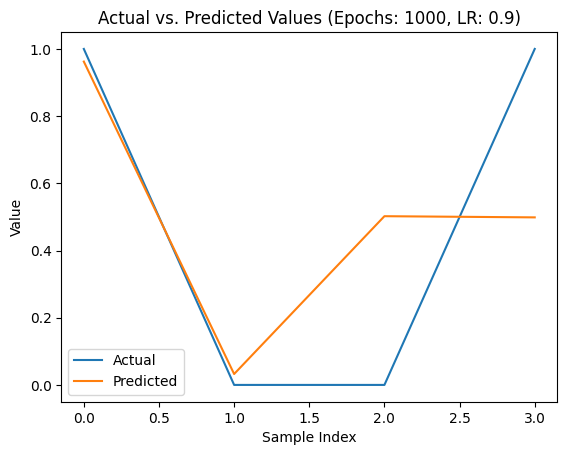

In [ ]:
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])

LogicGate = {
    "AND": [[0], [0], [0], [1]],
    "NAND": [[1], [1], [1], [0]],
    "OR": [[0], [1], [1], [1]],
    "NOR": [[1], [0], [0], [0]],
    "XOR": [[0], [1], [1], [0]],
    "XNOR": [[1], [0], [0], [1]]
}

y = LogicGate["XNOR"]

hidden_layer_sizes = [3, 4] # The size for the first hidden layer is 3 and the size for the second hidden layer is 4

layer_sizes = [2] + hidden_layer_sizes + [1]

mlp = MLP(layer_sizes)

epochs = 1000
learning_rate = 0.9

mse_values = mlp.train(X, y, epochs, learning_rate)

predictions = mlp.forward(X)

plt.plot(y, label = "Actual")
plt.plot(predictions, label = "Predicted")
plt.xlabel("Sample Index")
plt.ylabel("Value")
plt.title(f"Actual vs. Predicted Values (Epochs: {epochs}, LR: {learning_rate})")
plt.legend()
plt.show()